In [104]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [105]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### El Paso Condo Regression

In [106]:
file_path = Path("../Resources/elp_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,78992.0,"El Paso, TX",-30.821642,-1.586700
1996-02-29,78761.0,"El Paso, TX",-0.292435,-30.821642
1996-03-31,78616.0,"El Paso, TX",-0.184101,-0.292435
1996-04-30,78424.0,"El Paso, TX",-0.244225,-0.184101
1996-05-31,78454.0,"El Paso, TX",0.038254,-0.244225


<AxesSubplot:xlabel='date'>

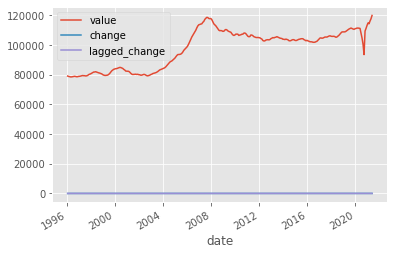

In [107]:
metro_df.plot()

In [108]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [109]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [110]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [111]:
predicted_y_values = model.predict(X)
predicted_y_values

array([ 1.47547907e-01,  2.15548445e+00,  5.86542154e-02,  5.12135778e-02,
        5.53430482e-02,  3.59416319e-02,  2.71005650e-02,  2.14387265e-02,
        3.29021719e-02,  4.91093060e-02,  5.50580917e-02,  3.34966708e-02,
        2.14406881e-02,  3.42103981e-02,  2.44560984e-02,  2.90058142e-02,
        1.78197025e-02,  4.78304473e-02,  3.97824096e-02,  5.13121042e-02,
        3.25764164e-02,  1.53137642e-02, -1.07248530e-02,  1.96788740e-02,
        1.23666197e-02,  5.04481915e-03,  6.48098994e-03,  4.01088657e-03,
        3.62150025e-02,  2.24328655e-02,  6.03687867e-02,  5.48867857e-02,
        6.39470984e-02,  5.08396667e-02,  6.41715838e-02,  5.63536378e-02,
        8.59187644e-02,  6.62310945e-02,  5.37497926e-02,  4.19403730e-02,
        2.74120351e-02,  2.98478675e-02, -4.10712331e-04, -1.64835462e-02,
       -3.56118240e-02, -3.43983910e-02, -4.65127914e-03, -5.12580366e-03,
        1.66130097e-02,  2.30766424e-02,  3.45614982e-02,  1.61727974e-02,
        1.23349206e-02,  

In [112]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.03856899446544864

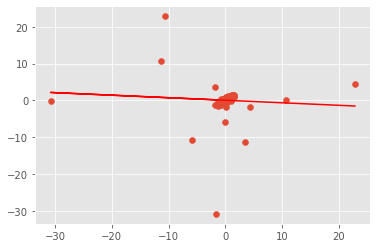

In [113]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [114]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [115]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.0047176869272066435
R-squared (R2 ): 0.0047176869272066435
Mean Squared Error (MSE): 6.501845950939828
Root Mean Squared Error (RMSE): 2.549871751861224
Standard Deviation: 2.5559078659648913


In [116]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [117]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [118]:
# Train the data
#classifier.fit(X_train, y_train)

In [119]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [120]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [121]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [122]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [123]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [124]:
# Predict Percent Change of Housing Prices using a 10 month window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [125]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [126]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [127]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [129]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 10
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [130]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [131]:
# Summarize the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 3, 10)             480       
_________________________________________________________________
dropout_9 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 3, 10)             840       
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 10)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [138]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=1, verbose=1)

Epoch 1/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2195
Epoch 2/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2213
Epoch 3/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2192
Epoch 4/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2119
Epoch 5/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2098
Epoch 6/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2137
Epoch 7/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2105
Epoch 8/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2057
Epoch 9/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2020
Epoch 10/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2111
Epoch 11/100
239/239 [==============================] - 1s 2ms/step - loss: 0.1968
Epoch 12/100
239/239 [==============================] - 1s 2ms/step - loss: 0.2048
Epoch 13/100


In [139]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 15.7100


15.709994316101074

In [140]:
# Make some predictions
predicted = model.predict(X_test)

In [141]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [142]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.tail()

,Real,Predicted
date,,
2021-01-31,108.249092,-10.416168
2021-02-28,769.163086,-25.071230
2021-03-31,-65.527167,-24.930073
2021-04-30,-55.726084,-24.228443
2021-05-31,-75.005210,-23.427023


<AxesSubplot:xlabel='date'>

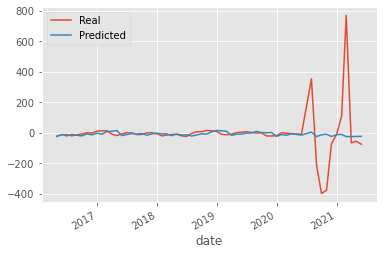

In [143]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [103]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)